# Dijkstra algorithm

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
from IPython.display import clear_output
import random
import time

In [2]:
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        
        self.f = 0
        
    def __eq__(self, other):
        if self.position == other.position:
            return True

In [3]:
show_animation  = True

In [4]:
def get_action():
    # dx, dy, cost
    action_set = [[0,-1,1], [0,1,1], [-1,0,1], [1,0,1],
                          [1,-1,np.sqrt(2)], [1,1,np.sqrt(2)], [-1,1,np.sqrt(2)], [-1,-1,np.sqrt(2)]]
    return action_set

In [5]:
def collision_check(omap, node):
    nx = node[0]
    ny = node[1]
    ox = omap[0]
    oy = omap[1]
    
    col = False

    for i in range(len(ox)):
        if nx == ox[i] and ny == oy[i]:
            col = True
            break

    return col

In [6]:
# a star algorithm
def a_star(start, goal, omap):
    
    # initialize
    start_node = Node(None, start)
    goal_node = Node(None, goal)

    Open = []
    Closed = []

    Open.append(start_node)
    
    while Open is not None:
        # find current node with lowest f in 'Open list'
        cur_node = Open[0]
        cur_ind = 0
        for ind, node in enumerate(Open):
            if node.f < cur_node.f:
                cur_node = node
                cur_ind = ind

        # If goal, get optimal path
        if cur_node.position == goal_node.position:
            opt_path = []

            node = cur_node

            while node is not None:
                opt_path.append(node.position)
                node = node.parent
            print("opt path : ", opt_path[::-1])
            print("opt_path_shape : ", np.shape(opt_path))
            return opt_path[::-1]

        # if not goal, delete from 'Open list' and add to 'Closed list'
        Open.pop(cur_ind)
        Closed.append(cur_node)

        # search child nodes
        action_set = get_action()
        
        for action in action_set:
            # position of child candidate
            child_cand = (cur_node.position[0] + action[0], cur_node.position[1] + action[1])

            if collision_check(omap, child_cand):
                continue

            # create new node
            child = Node(parent=cur_node, position=child_cand)
            
            # If in 'Closed list', continue 
            if child in Closed:
                continue
                
            child.f = cur_node.f + action[2]
            
            # if node is not in 'Open list', add it
            if child not in Open:
                Open.append(child)

            if child in Open:
                for node in Open:
                    if node == child and node.f > child.f:
                        node.f = child.f


opt path :  [(10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (10, 10), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 17), (10, 18), (10, 19), (10, 20), (10, 21), (10, 22), (10, 23), (10, 24), (10, 25), (10, 26), (10, 27), (10, 28), (10, 29), (10, 30), (10, 31), (11, 32), (12, 33), (13, 34), (14, 35), (15, 36), (16, 37), (17, 38), (18, 39), (19, 40), (20, 41), (21, 42), (22, 43), (23, 44), (24, 45), (25, 46), (26, 47), (27, 48), (28, 49), (29, 50), (30, 51), (31, 50), (31, 49), (31, 48), (31, 47), (31, 46), (31, 45), (31, 44), (31, 43), (31, 42), (31, 41), (31, 40), (31, 39), (31, 38), (31, 37), (31, 36), (31, 35), (31, 34), (31, 33), (31, 32), (31, 31), (31, 30), (32, 29), (33, 28), (34, 27), (35, 26), (36, 25), (37, 24), (38, 23), (39, 22), (40, 21), (41, 20), (42, 19), (43, 18), (44, 17), (45, 16), (46, 15), (47, 14), (48, 13), (49, 12), (50, 11), (51, 10), (50, 9), (49, 9), (48, 9), (47, 9), (46, 9), (45, 9), (44, 9), (43, 9), (42, 9), (41, 9), (40, 9), (39, 9), (38,

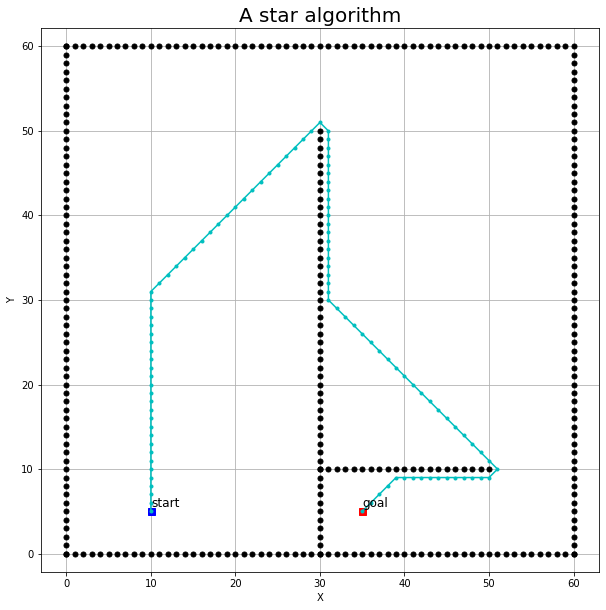

In [7]:
def main():
    
    # iNITIALIZE - 1)start, 2)goal, 3)map
    start = (10, 5) 
    goal = (35, 5)
    
    ox, oy = [], []
    
    for i in range(61):
        ox.append(i)
        oy.append(0)
    for i in range(61):
        ox.append(0)
        oy.append(i)
    for i in range(61):
        ox.append(i)
        oy.append(60)
    for i in range(60):
        ox.append(60)
        oy.append(i)
    for i in range(51):
        ox.append(30)
        oy.append(i)
    for i in range(21):
        ox.append(30+i)
        oy.append(10)
    
    omap = [ox, oy]

    opt_path = a_star(start, goal, omap)
    
    opt_path = np.array(opt_path)

    if show_animation == True:
        plt.figure(figsize=(10,10))
        plt.plot(start[0], start[1], 'bs',  markersize=7)
        plt.text(start[0], start[1]+0.5, 'start', fontsize=12)
        plt.plot(goal[0], goal[1], 'rs',  markersize=7)
        plt.text(goal[0], goal[1]+0.5, 'goal', fontsize=12)

        plt.plot(ox, oy, '.k',  markersize=10)
        plt.grid(True)
        plt.axis("equal")
        plt.plot(opt_path[:,0], opt_path[:,1], "c.-")
        plt.xlabel("X"), plt.ylabel("Y")
        plt.title("A star algorithm", fontsize=20)
        plt.show()
    
    
if __name__ == "__main__":
    main()